# CIA World Factbook database.

The [CIA World Factbook database](https://www.cia.gov/the-world-factbook/) is a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like the following:

- `name` — the name of the country.
- `area`— the country's total area (both land and water).
- `area_land` — the country's land area in square kilometers.
- `area_water` — the country's waterarea in square kilometers.
- `population` — the country's population.
- `population_growth`— the country's population growth as a percentage.
- `birth_rate` — the country's birth rate, or the number of births per year per 1,000 people.
- `death_rate` — the country's death rate, or the number of death per year per 1,000 people.

Then we will make a series of requests to the database to obtain the information we need.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%capture
%load_ext sql 

In [3]:
%sql sqlite:///factbook.db 

'Connected: @factbook.db'

### Overview of the Data

Table information in the database.

In [4]:
%%sql
SELECT *
  FROM sqlite_master 
WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


#### Missing values:

In [5]:
%%sql

SELECT COUNT(*) AS 'TOTAL ROWS',
        COUNT(*) - COUNT(code) AS "NULL's in CODE",
        COUNT(*) - COUNT(area) AS "NULL's in AREA",
        COUNT(*) - COUNT(area_land) AS "NULL's in AREA LAND",
        COUNT(*) - COUNT(area_water) AS "NULL's in AREA H2O",
        COUNT(*) - COUNT(population) AS "NULL's in POP",
        COUNT(*) - COUNT(population_growth) AS "NULL's in POP_GRW",
        COUNT(*) - COUNT(birth_rate) AS "NULL's in BIRTH RATE",
        COUNT(*) - COUNT(death_rate) AS "NULL's in DEATH RATE",
        COUNT(*) - COUNT(migration_rate) AS "NULL's in MIGRATION RATE"
    FROM facts;

 * sqlite:///factbook.db
Done.


TOTAL ROWS,NULL's in CODE,NULL's in AREA,NULL's in AREA LAND,NULL's in AREA H2O,NULL's in POP,NULL's in POP_GRW,NULL's in BIRTH RATE,NULL's in DEATH RATE,NULL's in MIGRATION RATE
261,0,12,15,18,19,25,33,33,38


The first five rows of the `facts` table in the database.

In [6]:
%%sql

SELECT *
    FROM facts
LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### Summary Statistics.

Single query with `Minimum / Maximum population` and `Minimum / Maximum growth`.

In [7]:
%%sql

SELECT MIN(population) AS `Minimum population on a Country`,
    MAX(population) AS `Maximum number of population`, 
    MIN(population_growth) AS `Minimum Growth population`,  
    MAX(population_growth) AS `Maximum growth population`
FROM facts;

 * sqlite:///factbook.db
Done.


Minimum population on a Country,Maximum number of population,Minimum Growth population,Maximum growth population
0,7256490011,0.0,4.02


### Exploring Outliers:

#### Which is the country with `0` population?

In [8]:
%%sql

SELECT name AS 'Country', population AS Population
    FROM facts
    WHERE population = (SELECT MIN(population)
                       FROM facts)
    ORDER BY population DESC;

 * sqlite:///factbook.db
Done.


Country,Population
Antarctica,0


# 🐧

#### Which are the ten countries with the smallest population?

In [9]:
%%sql

SELECT name AS 'Country', population AS 'Population'
    FROM facts
    WHERE population > (SELECT MIN(population)
                       FROM facts)
    ORDER BY population ASC
    LIMIT 10;

 * sqlite:///factbook.db
Done.


Country,Population
Pitcairn Islands,48
Cocos (Keeling) Islands,596
Holy See (Vatican City),842
Niue,1190
Tokelau,1337
Christmas Island,1530
Svalbard,1872
Norfolk Island,2210
Falkland Islands (Islas Malvinas),3361
Montserrat,5241


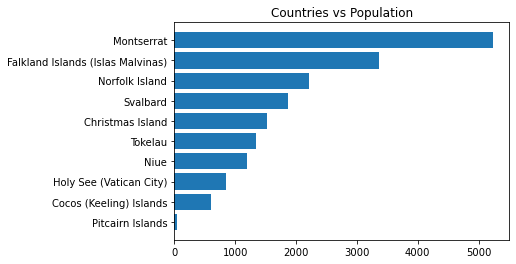

In [10]:
import matplotlib.pyplot as plt

smallest_pop = _ 
df_smallest_pop = smallest_pop.DataFrame()

countries = df_smallest_pop['Country']
population = df_smallest_pop['Population']

plt.title("Countries vs Population")
plt.barh(countries, population)

plt.show()

#### To whom does that number belong?

In [11]:
%%sql 

SELECT name AS 'Country', population AS 'Population'
    FROM facts
    WHERE population = (SELECT MAX(population)
                       FROM facts)
    ORDER BY population DESC;

 * sqlite:///factbook.db
Done.


Country,Population
World,7256490011


# 🌐

#### Which are the ten countries with the largest population?

In [12]:
%%sql

SELECT name AS 'Country', population AS 'Population'
    FROM facts
    WHERE population < (SELECT MAX(population)
                        FROM facts)
    ORDER BY population DESC
    LIMIT 10;

 * sqlite:///factbook.db
Done.


Country,Population
China,1367485388
India,1251695584
European Union,513949445
United States,321368864
Indonesia,255993674
Brazil,204259812
Pakistan,199085847
Nigeria,181562056
Bangladesh,168957745
Russia,142423773


#### Is there a country where children are not born?

In [13]:
%%sql

SELECT name AS 'Country', population_growth AS 'Number of births'
    FROM facts
    WHERE population_growth = (SELECT MIN(population_growth)
                       FROM facts)
    ORDER BY population DESC;

 * sqlite:///factbook.db
Done.


Country,Number of births
Greenland,0.0
Holy See (Vatican City),0.0
Cocos (Keeling) Islands,0.0
Pitcairn Islands,0.0


- [Geendland](https://visitgreenland.com/)

- [Holy See (Vatican City)](https://www.vatican.va/content/vatican/en.html)

- [Cocos (Keeling) Islands](https://www.cocoskeelingislands.com.au/)

- [Pitcairn Islands](https://www.government.pn/)

#### Which are the ten countries with the highest birth rate on the planet?

In [14]:
%%sql

SELECT name, population_growth AS 'Births'
    FROM facts
    WHERE population_growth <= (SELECT MAX(population_growth)
                              FROM facts)
    ORDER BY population_growth DESC
    LIMIT 10;

 * sqlite:///factbook.db
Done.


name,Births
South Sudan,4.02
Malawi,3.32
Burundi,3.28
Niger,3.25
Uganda,3.24
Qatar,3.07
Burkina Faso,3.03
Mali,2.98
Cook Islands,2.95
Iraq,2.93


# 🐣

#### Exploring Average Population and Area

In [15]:
%%sql

SELECT  MIN(population) AS 'Minim population',
        MAX(population) AS 'Max population', 
        MIN(population_growth) AS 'Minim growth', 
        MAX(population_growth) AS 'Max growth'
    FROM facts
    WHERE (population < (SELECT MAX(population)
                       FROM facts)
          )
    AND (population_growth = (SELECT MAX(population_growth)
                       FROM facts)
        );

 * sqlite:///factbook.db
Done.


Minim population,Max population,Minim growth,Max growth
12042910,12042910,4.02,4.02


In [16]:
%%sql

SELECT  ROUND(AVG(population)) AS 'Avg # population',
        ROUND(AVG(area)) AS 'Avg area Km^2'
    FROM facts;

 * sqlite:///factbook.db
Done.


Avg # population,Avg area Km^2
62094928.0,555094.0


#### The most Densely Populated Countries:

In [17]:
%%sql

SELECT name, population
    FROM facts
        WHERE population > (SELECT AVG(population) FROM facts) 
        AND area < (SELECT AVG(area) FROM facts)               
        ORDER BY population DESC;

 * sqlite:///factbook.db
Done.


name,population
Bangladesh,168957745
Japan,126919659
Philippines,100998376
Vietnam,94348835
Germany,80854408
Thailand,67976405
United Kingdom,64088222


#### Ten countries with the lowest population density:

In [18]:
%%sql

SELECT name, population
    FROM facts
        WHERE population < (SELECT AVG(population) FROM facts) 
        AND area > (SELECT AVG(area) FROM facts)               
        ORDER BY population DESC
        LIMIT 10;

 * sqlite:///factbook.db
Done.


name,population
Burma,56320206
South Africa,53675563
Tanzania,51045882
Colombia,46736728
Kenya,45925301
Ukraine,44429471
Argentina,43431886
Algeria,39542166
Sudan,36108853
Canada,35099836


#### The country with the largest number of people?

In [19]:
%%sql

SELECT name, MAX(population)
FROM facts
WHERE population < (SELECT MAX(population) FROM facts);

 * sqlite:///factbook.db
Done.


name,MAX(population)
China,1367485388


#### Which country has the highest growth rate?

In [20]:
%%sql

SELECT name, population_growth
FROM facts
WHERE population_growth = (SELECT MAX(population_growth) FROM facts);

 * sqlite:///factbook.db
Done.


name,population_growth
South Sudan,4.02


#### Countries with more water than land:

In [21]:
%%sql

SELECT name, area_water, area_land,
    CAST(area_water AS FLOAT) / area_land AS 'ratio: H2O/Km²'
    FROM facts
    WHERE area_water <= (SELECT MAX(area_water) FROM facts)
    AND area_land < (SELECT area_water facts)               
    ORDER BY  CAST(area_water AS FLOAT) / area_land DESC
LIMIT 10;

 * sqlite:///factbook.db
Done.


name,area_water,area_land,ratio: H2O/Km²
British Indian Ocean Territory,54340,60,905.6666666666666
Virgin Islands,1564,346,4.520231213872832


- [British Indian Ocean Territory	](https://www.biot.gov.io/)

- [https://www.bvitourism.com/](https://www.bvitourism.com/)

#### Ten countries have the highest ratios of water to land? 

In [22]:
%%sql

SELECT name, area_water, area_land,
    CAST(area_water AS FLOAT) / area_land AS 'H2O/Km²'
    FROM facts
    WHERE area_water <= (SELECT MAX(area_water) FROM facts)
    ORDER BY  area_water DESC
LIMIT 10;

 * sqlite:///factbook.db
Done.


name,area_water,area_land,H2O/Km²
Canada,891163,9093507,0.09799992456155804
Russia,720500,16377742,0.04399263341674328
United States,664709,9161966,0.07255091319919764
India,314070,2973193,0.10563390940312317
China,270550,9326410,0.029009018475490568
Brazil,157630,8358140,0.018859459161966657
Iran,116600,1531595,0.07612978626856316
Ethiopia,104300,None,None
Colombia,100210,1038700,0.09647636468662751
Indonesia,93000,1811569,0.0513367141963679


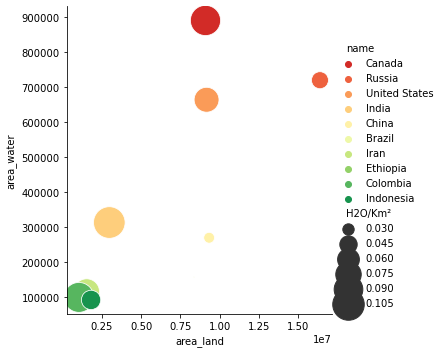

In [23]:
data = _
info = data.DataFrame()

sns.relplot(data=info, y='area_water', x='area_land',
            hue = 'name', palette='RdYlGn',
           size = 'H2O/Km²', sizes = (1,1000))
plt.show()

#### Ten countries will add the most people to their populations next year:

In [24]:
%%sql

SELECT name,birth_rate,death_rate, CAST (birth_rate AS FLOAT) / CAST(death_rate AS FLOAT) AS 'ratio birth'
    FROM facts
    WHERE birth_rate > (SELECT MAX(death_rate) FROM facts )
    ORDER BY (CAST (birth_rate AS FLOAT) / CAST(death_rate AS FLOAT)) DESC
LIMIT 10;

 * sqlite:///factbook.db
Done.


name,birth_rate,death_rate,ratio birth
Gaza Strip,31.11,3.04,10.233552631578947
Kuwait,19.91,2.18,9.133027522935778
Iraq,31.45,3.77,8.342175066312997
United Arab Emirates,15.43,1.97,7.83248730964467
Oman,24.44,3.36,7.273809523809525
Jordan,25.37,3.79,6.693931398416887
Solomon Islands,25.77,3.85,6.693506493506494
West Bank,22.99,3.5,6.5685714285714285
Vanuatu,25.04,4.09,6.1222493887530565
Marshall Islands,25.6,4.21,6.080760095011877


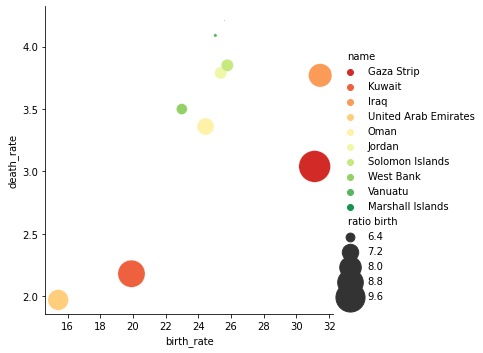

In [25]:
data = _
info = data.DataFrame()

sns.relplot(data=info, x='birth_rate', y='death_rate',
            hue = 'name', palette='RdYlGn',
           size = 'ratio birth', sizes = (1,1000))
plt.show()

#### Ten countries with a higher death rate than birth rate? 

In [26]:
%%sql

SELECT name,birth_rate,death_rate, CAST (death_rate AS FLOAT) / CAST (birth_rate AS FLOAT) AS 'ratio death'
    FROM facts
    WHERE birth_rate <= (SELECT MAX(death_rate) FROM facts )
    ORDER BY (CAST (death_rate AS FLOAT) / CAST (birth_rate AS FLOAT)) DESC
    LIMIT 10;

 * sqlite:///factbook.db
Done.


name,birth_rate,death_rate,ratio death
Bulgaria,8.92,14.44,1.6188340807174888
Serbia,9.08,13.66,1.5044052863436124
Latvia,10.0,14.31,1.431
Lithuania,10.1,14.27,1.4128712871287128
Hungary,9.16,12.73,1.3897379912663756
Monaco,6.65,9.24,1.3894736842105262
Slovenia,8.42,11.37,1.350356294536817
Ukraine,10.72,14.46,1.3488805970149254
Germany,8.47,11.42,1.3482880755608027
Saint Pierre and Miquelon,7.42,9.72,1.3099730458221026


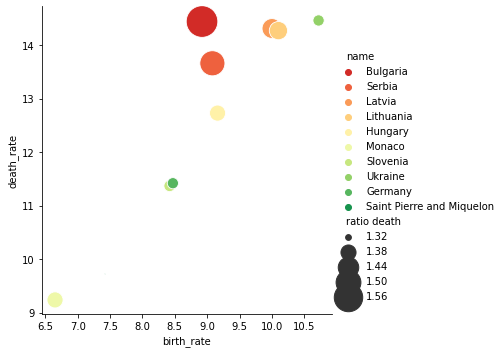

In [27]:
data = _
info = data.DataFrame()

sns.relplot(data=info, x='birth_rate', y='death_rate',
            hue = 'name', palette='RdYlGn',
           size = 'ratio death', sizes = (1,1000))
plt.show()

####  Ten countries with the highest population/area ratio:

In [28]:
%%sql

SELECT name, population, area, CAST (population AS FLOAT) / CAST (area AS FLOAT) AS 'population/area ratio'
    FROM facts
    WHERE population < (SELECT MAX(population) FROM facts)
    ORDER BY (CAST(population AS FLOAT) / CAST(area AS FLOAT)) DESC
LIMIT 10;

 * sqlite:///factbook.db
Done.


name,population,area,population/area ratio
Macau,592731,28,21168.964285714286
Monaco,30535,2,15267.5
Singapore,5674472,697,8141.279770444763
Hong Kong,7141106,1108,6445.041516245487
Gaza Strip,1869055,360,5191.819444444444
Gibraltar,29258,6,4876.333333333333
Bahrain,1346613,760,1771.8592105263158
Maldives,393253,298,1319.6409395973155
Malta,413965,316,1310.01582278481
Bermuda,70196,54,1299.9259259259259


In [29]:
data = _

info = data.DataFrame()

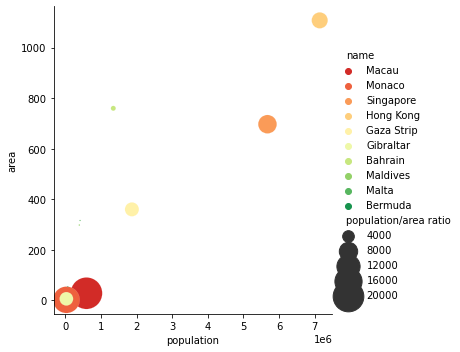

In [30]:
data = _
info = data.DataFrame()

sns.relplot(data=info, x='population', y='area',
            hue = 'name', palette='RdYlGn',
           size = 'population/area ratio', sizes = (1,1000))
plt.show()